In [13]:
# Scrape all these six representative songs over decades, since the song ' Despacito' is a spanish song, I scrape the English version separately.
from bs4 import BeautifulSoup
import pandas as pd
import requests
import csv
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
import numpy as np
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
en_stops = set(stopwords.words('english'))
url = ('http://www.metrolyrics.com/hey-jude-lyrics-beatles.html', 
       'http://www.metrolyrics.com/you-light-up-my-life-lyrics-debby-boone.html',
       'http://www.metrolyrics.com/physical-lyrics-olivia-newtonjohn.html',
      'http://www.metrolyrics.com/one-sweet-day-with-boyz-ii-men-lyrics-mariah-carey.html',
       'http://www.metrolyrics.com/we-belong-together-lyrics-mariah-carey.html')

def scrape(url):
    r = requests.get(url)
    t = r.text
    mypage = BeautifulSoup(t)
    lyrics = mypage.find_all('p', attrs={'class': 'verse'})
    full_lyric = []
    for i in lyrics:
        lyric = i.text
        full_lyric.append(lyric)
    join_words=''.join(full_lyric)
    clean=join_words.replace('\n', '')  #remove all punctuations in the texts
    table = str.maketrans({key: None for key in string.punctuation})
    new_s = clean.translate(table) 
    lower=str.lower(new_s)
    split=lower.split()
    without_stopwords = []
    stop_words = ['yeah,','yeah','gotta','got','nanananaananananaa', 'nanananaa','na','ma','judena','yeahnanananaa','onyou','well','weve','gonna','judy','judejude','judeyeah']
    for w in split:
        if w not in stop_words:
            without_stopwords.append(w)
    filtered_data=[]
    for words in without_stopwords:
        if words not in en_stops:
            filtered_data.append(words)
    return filtered_data

In [36]:
despacito='https://lyricstranslate.com/en/slowly-lyrics.html-0#songtranslation'
re = requests.get(despacito)
te = re.text
mypag = BeautifulSoup(te)
lyric = mypag.find_all('div', attrs={'class': 'par'})
full_ly = []
for i in lyric:
    lyric_ = i.text
    full_ly.append(lyric_)
    
join_=''.join(full_ly)
clean_=join_.replace('\n', '')  #remove all punctuations in the texts
table_ = str.maketrans({key: None for key in string.punctuation})
new_ = clean_.translate(table_) 
lower_=str.lower(new_)
split_=lower_.split()

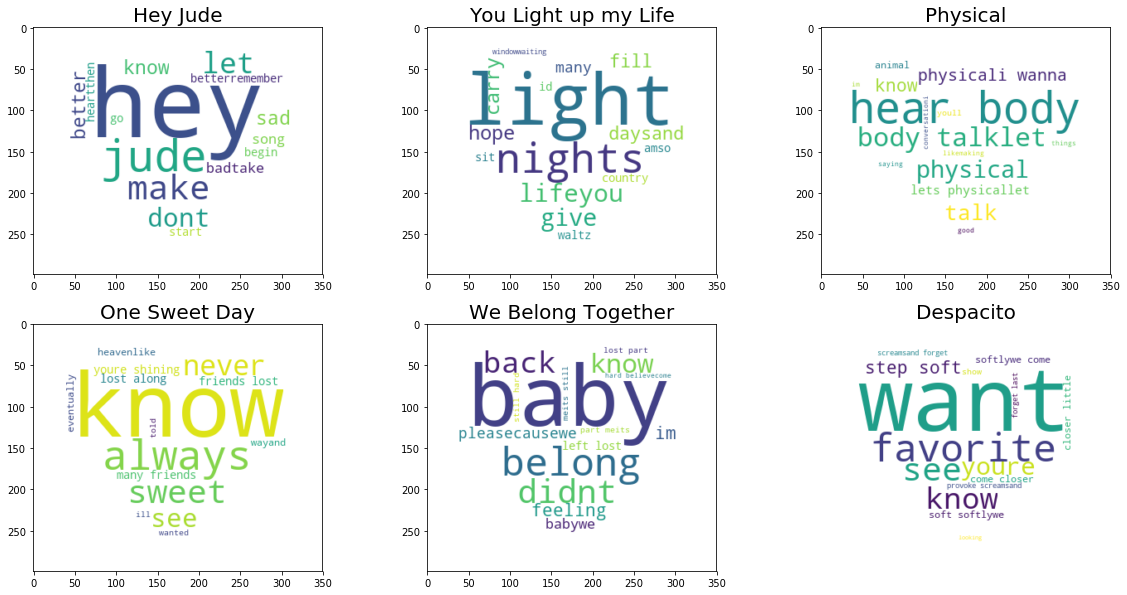

In [39]:
stopwords = set(STOPWORDS)
from PIL import Image
import wordcloud
import numpy as np

plt.figure(figsize=(20,10))
mask = np.array(Image.open('heart.png')) #set mask, you can change to the picture you like, but it must have a high color contrast
wc = wordcloud.WordCloud(mode='RGBA',background_color='white',max_words=15,stopwords=stopwords,max_font_size=300,random_state=42,mask=mask)
plt.subplot(2,3,1) 
wc.generate_from_text(' '.join(mydata[0]))
plt.imshow(wc, interpolation='bilinear')
plt.title('Hey Jude', loc='Center', fontsize=20)

plt.subplot(2,3,2) 
wc.generate_from_text(' '.join(mydata[1]))
plt.imshow(wc, interpolation='bilinear')
plt.title('You Light up my Life', loc='Center', fontsize=20)

plt.subplot(2,3,3) 
wc.generate_from_text(' '.join(mydata[2]))
plt.imshow(wc, interpolation='bilinear')
plt.title('Physical', loc='Center', fontsize=20)

plt.subplot(2,3,4) 
wc.generate_from_text(' '.join(mydata[3]))
plt.imshow(wc, interpolation='bilinear')
plt.title('One Sweet Day', loc='Center', fontsize=20)

plt.subplot(2,3,5) 
wc.generate_from_text(' '.join(mydata[4]))
plt.imshow(wc, interpolation='bilinear')
plt.title('We Belong Together', loc='Center', fontsize=20)

plt.subplot(2,3,6) 
wc.generate_from_text(' '.join(split_))
plt.imshow(wc, interpolation='bilinear')
plt.title('Despacito', loc='Center', fontsize=20)

plt.axis("off")
plt.savefig('lyrics.png')
plt.show()

